In [1]:
import pandas as pd
import wikidataintegrator as wdi

# Gottlieb et al 2011, PMID:21654673

This paper does predictions based on similarity of chemcial compounds. Question here is how reliable this approach is as small changes to a compound can substantially alter it's efficacy/target binding affinity

#### Indication gold standard file

In [2]:
ind_gold = pd.read_excel('./paper_data/Gottlieb et al 2011 PMID:21654673/inline-supplementary-material-1.xls', header=0)
ind_gold.count()

Drug name       1933
Disease name    1933
dtype: int64

In [3]:
len(ind_gold['Drug name'].value_counts())

593

In [4]:
len(ind_gold['Disease name'].value_counts())

313

#### Indication predictions for repositioning of approved drugs

In [5]:
repo_pred = pd.read_excel('./paper_data/Gottlieb et al 2011 PMID:21654673/inline-supplementary-material-2.xls', header=0)
repo_pred.count()

Score           9476
Drug name       9476
Disease name    9476
dtype: int64

In [6]:
len(repo_pred['Drug name'].value_counts())

580

In [7]:
len(repo_pred['Disease name'].value_counts())

305

#### Indication predictions for experimental compounds

In [8]:
exp_pred = pd.read_excel('./paper_data/Gottlieb et al 2011 PMID:21654673/inline-supplementary-material-3.xls', header=0)
exp_pred.count()

Score           3108
Drug name       3108
Disease name    3108
dtype: int64

In [9]:
len(exp_pred['Drug name'].value_counts())

369

In [10]:
len(exp_pred['Disease name'].value_counts())

253

In [11]:
exp_pred.head(100)

,Score,Drug name,Disease name
0,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Acroosteolysis With Osteoporosis And Changes I...
1,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Osteoporosis
2,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Inclusion Body Myopathy With Early-Onset Paget...
3,0.998231,1-Hydroxy-2-(3-Pyridinyl)Ethylidene Bis-Phosph...,Paget Disease Of Bone; Pdb
4,0.997898,3-Methylfentanyl,Insensitivity To Pain With Hyperplastic Myelin...
5,0.997898,"(4S-Trans)-4-(Ethylamino)-5,6-Dihydro-6-Methyl...","Glaucoma 1, Open Angle, A; Glc1A"
6,0.997898,"(4S-Trans)-4-(Ethylamino)-5,6-Dihydro-6-Methyl...","Glaucoma, Primary Open Angle; Poag"
7,0.997898,"(4S-Trans)-4-(Ethylamino)-5,6-Dihydro-6-Methyl...","Renal Failure, Progressive, With Hypertension"
8,0.997898,"(4S-Trans)-4-(Ethylamino)-5,6-Dihydro-6-Methyl...","Glaucoma 1, Open Angle, C; Glc1C"
9,0.997898,[1-Hydroxy-3-(Methyl-Pentyl-Amino)-1-Phosphono...,Acroosteolysis With Osteoporosis And Changes I...


In [12]:
omim_umls_map = pd.read_excel('./paper_data/Gottlieb et al 2011 PMID:21654673/inline-supplementary-material-4.xls', header=0)

In [13]:
omim_umls_map.head()

,OMIM ID,OMIM disease name,UMLS concept ID,UMLS concept name
0,102100,"Acromegaloid Changes, Cutis Verticis Gyrata, A...",C1868756,Corneal leukoma
1,102100,"Acromegaloid Changes, Cutis Verticis Gyrata, A...",C0263417,Cutis verticis gyrata
2,102300,"Restless Legs Syndrome, Susceptibility To, 1; ...",C0035258,Restless Legs Syndrome
3,102300,"Restless Legs Syndrome, Susceptibility To, 1; ...",C1876177,RLS1 (Ekbom Syndrome)
4,102400,Acroosteolysis,C0917990,Acroosteolysis (Acro-Osteolysis)


In [14]:
omim_umls_map.count()

OMIM ID              617
OMIM disease name    617
UMLS concept ID      617
UMLS concept name    617
dtype: int64

In [15]:
len(omim_umls_map['UMLS concept ID'].unique())

475

In [16]:
query = '''
select distinct ?d ?omim ?umls where { 
  {?d wdt:P492 ?omim .} UNION
  {?d wdt:P2892 ?umls .} 
}
group by ?d ?omim ?umls
'''

r = wdi.wdi_core.WDItemEngine.execute_sparql_query(query)

umls_map = {}
omim_map = {}

for x in r['results']['bindings']:
    
    if 'umls' in x:
        umls_map.update({x['umls']['value']: x['d']['value']})
    elif 'omim' in x:
        omim_map.update({x['omim']['value']: x['d']['value']})
        


In [17]:
for c, x in omim_umls_map.iterrows():
    if x['UMLS concept ID'] in umls_map:
        omim_umls_map.loc[c, 'Wikidata'] = umls_map[x['UMLS concept ID']]
    else:
        print(x['UMLS concept ID'], 'not found in WD')
        
    if x['OMIM ID'] in omim_map and pd.isnull(omim_umls_map.loc[c, 'Wikidata']):
        omim_umls_map.loc[c, 'Wikidata'] = omim_map[x['OMIM ID']]
                                              

C1868756 not found in WD
C1876177 not found in WD
C1962963 not found in WD
C1563292 not found in WD
C0040416 not found in WD
C0001973 not found in WD
C1306341 not found in WD
C0553735 not found in WD
C0034219 not found in WD
C0870082 not found in WD
C1834057 not found in WD
C0240896 not found in WD
C0520679 not found in WD
C0004364 not found in WD
C0162311 not found in WD
C1303003 not found in WD
C0033377 not found in WD
C0007758 not found in WD
C0027066 not found in WD
C0037771 not found in WD
C0019204 not found in WD
C1512411 not found in WD
C1560249 not found in WD
C0205700 not found in WD
C1861864 not found in WD
C0042842 not found in WD
C0086543 not found in WD
C0151686 not found in WD
C1850258 not found in WD
C1456687 not found in WD
C1852587 not found in WD
C1852581 not found in WD
C0852949 not found in WD
C0333463 not found in WD
C0242422 not found in WD
C0342276 not found in WD
C1852093 not found in WD
C0342276 not found in WD
C1841962 not found in WD
C0265309 not found in WD


In [18]:
omim_umls_map.count()

OMIM ID              617
OMIM disease name    617
UMLS concept ID      617
UMLS concept name    617
Wikidata             320
dtype: int64

In [19]:
# drug_wd_map = {}
# compound_query = '''
# select * where { ?drug wdt:P2275 ?who . }
# '''

# response = wdi.wdi_core.WDItemEngine.execute_sparql_query(compound_query)
# for x in response['results']['bindings']:
#     drug_wd_map.update({x['who']['value'].lower(): x['drug']['value']})

# drug_query = '''
# SELECT * WHERE {
#     ?compound wdt:P2275 ?who_name FILTER (LANG(?who_name) = "en") .  
# }
# '''

# http://tinyurl.com/z6397rh
drug_query = '''
SELECT ?compound ?label ?who_name (GROUP_CONCAT(DISTINCT(?alias); separator="|") AS ?aliases) WHERE {{
  {{?compound wdt:P31 wd:Q11173 .}} UNION  # chemical compound
  {{?compound wdt:P31 wd:Q12140 .}} UNION  # pharmaceutical drug
  {{?compound wdt:P31 wd:Q79529 .}} UNION  # chemical substance
  {{?compound wdt:P2275 ?who_name FILTER (LANG(?who_name) = "en") .}}
  
  OPTIONAL {{
    ?compound rdfs:label ?label FILTER (LANG(?label) = "en") .
  }}
  OPTIONAL {{
    ?compound skos:altLabel ?alias FILTER (LANG(?alias) = "en") .
  }}
}}
GROUP BY ?compound ?label ?who_name ?aliases
OFFSET {0}
LIMIT 100000
'''


drug_qid_map = {}

cc = 0
while True:
    r = wdi.wdi_core.WDItemEngine.execute_sparql_query(query=drug_query.format(100000 * cc))
    cc += 1
    
    if len(r['results']['bindings']) == 0:
        break
    
    for x in r['results']['bindings']:
        qid = x['compound']['value']
        
        if 'who_name' in x:
            drug_qid_map.update({x['who_name']['value'].lower(): qid})
            
        if 'label' in x:
            drug_qid_map.update({x['label']['value'].lower(): qid})
            
        if 'aliases' in x:
            drug_qid_map.update({y.lower(): qid for y in x['aliases']['value'].split('|')})
            
#         count += 1
            
print('Drug to QID map has {} entries!'.format(len(drug_qid_map)))

Drug to QID map has 274519 entries!


In [20]:
repo_pred.head()

,Score,Drug name,Disease name
0,0.996645,Gonadorelin,"Endometriosis, Susceptibility To, 1"
1,0.996645,Escitalopram,Alcohol Dependence
2,0.996645,Escitalopram,Encephalopathy With Intracranial Calcification...
3,0.996645,Gonadorelin,"Pyogenic Sterile Arthritis, Pyoderma Gangrenos..."
4,0.996645,Levofloxacin,"Helicobacter Pylori Infection, Susceptibility To"


In [21]:
missing_drug = set()
for c, x in repo_pred.iterrows():
    if not x['Disease name'] in omim_umls_map['OMIM disease name'].values:
        print(x['Disease name'], 'not found', end=' ')
        
    if not x['Drug name'].lower() in drug_qid_map:
        print(x['Drug name'], 'not found')
        missing_drug.add(x['Drug name'].lower())
        
print(missing_drug)

# missing_manual_dict = {'ethacrynic acid': 'Q418571', 'nitroglycerin': 'Q162867', 'ethinyl estradiol', 'apomorphine', 'dyphylline',
#                        'amphetamine', 'alendronate', 'meperidine', 'levothyroxine', 'vinorelbine', 
#                        'divalproex sodium', 'cyclosporine', 'l-carnitine', 'diphenidol', 'sucralfate', 
#                        'enoxaparin', 'ranitidine', 'pamidronate', 'valrubicin', 'lisinopril', 'cocaine', 
#                        'theophylline', 'isoetharine', 'vasopressin', 'magnesium', 'porfimer', 'metyrosine', 
#                        'salmon calcitonin', 'fumarate', 'propoxyphene', 'methimazole', 'desmopressin', 'fludrocortisone',
#                        'conjugated estrogens', 'choline', 'halobetasol propionate', 'acetaminophen', 'beclomethasone', 
#                        'argatroban', 'glucosamine', 'flurandrenolide', 'epoprostenol', 'isoproterenol', 
#                        'pyridoxal phosphate', 'neostigmine', 'palmitic acid', 'benztropine', 'levetiracetam', 
#                        'methotrimeprazine', 'vitamin c', 'hyoscyamine', 'pentosan polysulfate', 'thioguanine', 
#                        'pilocarpine', 'leucovorin', 'norethindrone', 'guanadrel sulfate', 'tramadol', 'octreotide', 
#                        'mercaptopurine', 'l-alanine', 'mitomycin', 'zoledronate', 'bismuth', 'phenylpropanolamine', 
#                        'dipivefrin', 'heparin', 'leuprolide', 'adenosine monophosphate', 'vitamin a', 'aspirin', 
#                        'dextromethorphan', 'thiothixene', 'colchicine', 'quinidine', 'citric acid', 'trandolapril', 
#                        'diethylpropion', 'l-isoleucine', 'methylergonovine', 'vitamin e', 'cromoglicate', 'hydroxyurea', 
#                        'glimepiride', 'quinine', 'caffeine', 'urea', 'chlorthalidone', 'morphine', 'ardeparin', 'fosinopril', 
#                        'dextroamphetamine', 'magnesium sulfate', 'sermorelin', 'ipratropium', 'doxepin', 'fluticasone propionate', 
#                        'salicyclic acid', 'methamphetamine', 'ethanol', 'scopolamine', 'risedronate', 
#                        'clidinium', 'gonadorelin', 'ambenonium', 'indomethacin', 'tiludronate', 'guanidine', 'dicyclomine', 
#                        'benzphetamine', 'pyridostigmine', 'niacin', 'vinblastine', 'bethanechol', 'cholecalciferol'}

Peripheral Neuropathy, Ataxia, Focal Necrotizing Encephalopathy, And Spongy Degeneration Of Brain not found Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Peripheral Neuropathy, Ataxia, Focal Necrotizing Encephalopathy, And Spongy Degeneration Of Brain not found Peripheral Neuropathy, Ataxia, Focal Necrotizing Encephalopathy, And Spongy Degeneration Of Brain not found Ardeparin not found
Peripheral Neuropathy, Ataxia, Focal Necrotizing Encephalopathy, And Spongy Degeneration Of Brain not found Peripheral Neuropathy, Ataxia, Focal Necrotizing Encephalopathy, And Spongy Degeneration Of Brain not found Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Salicyclic Acid not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone not found
Beclomethasone

In [22]:
print(len(missing_drug))
print(omim_umls_map.loc[omim_umls_map['OMIM disease name'].isin([x['Disease name']]), 'OMIM disease name'])

18
482    Epilepsy, X-Linked, With Variable Learning Dis...
483    Epilepsy, X-Linked, With Variable Learning Dis...
Name: OMIM disease name, dtype: object


In [23]:
for c, x in repo_pred.iterrows():
    if x['Disease name'] in omim_umls_map['OMIM disease name'].values:
        repo_pred.loc[c, 'disease_qid'] = omim_umls_map.loc[omim_umls_map['OMIM disease name'].isin([x['Disease name']]), 'Wikidata'].values[0]
        
    if x['Drug name'].lower() in drug_qid_map:
        repo_pred.loc[c, 'drug_qid'] = drug_qid_map[x['Drug name'].lower()]
        
    

In [24]:
repo_pred.head()

,Score,Drug name,Disease name,disease_qid,drug_qid
0,0.996645,Gonadorelin,"Endometriosis, Susceptibility To, 1",http://www.wikidata.org/entity/Q205764,http://www.wikidata.org/entity/Q20817116
1,0.996645,Escitalopram,Alcohol Dependence,NaN,http://www.wikidata.org/entity/Q423757
2,0.996645,Escitalopram,Encephalopathy With Intracranial Calcification...,http://www.wikidata.org/entity/Q576349,http://www.wikidata.org/entity/Q423757
3,0.996645,Gonadorelin,"Pyogenic Sterile Arthritis, Pyoderma Gangrenos...",http://www.wikidata.org/entity/Q79928,http://www.wikidata.org/entity/Q20817116
4,0.996645,Levofloxacin,"Helicobacter Pylori Infection, Susceptibility To",NaN,http://www.wikidata.org/entity/Q424193


In [49]:
def get_wd_label(qid):
    item = wdi.wdi_core.WDItemEngine(wd_item_id=qid)
    
    return item.get_label()

In [52]:
for c, x in repo_pred.iterrows():
    if pd.notnull(x['disease_qid']):
        repo_pred.loc[c, 'wd_disease_label'] = get_wd_label(x['disease_qid'].split('/').pop())
    
    if pd.notnull(x['drug_qid']):
        repo_pred.loc[c, 'wd_drug_label'] = get_wd_label(x['drug_qid'].split('/').pop())

KeyboardInterrupt: 

In [51]:
repo_pred.head()

,Score,Drug name,Disease name,disease_qid,drug_qid
0,0.996645,Gonadorelin,"Endometriosis, Susceptibility To, 1",http://www.wikidata.org/entity/Q205764,http://www.wikidata.org/entity/Q20817116
1,0.996645,Escitalopram,Alcohol Dependence,NaN,http://www.wikidata.org/entity/Q423757
2,0.996645,Escitalopram,Encephalopathy With Intracranial Calcification...,http://www.wikidata.org/entity/Q576349,http://www.wikidata.org/entity/Q423757
3,0.996645,Gonadorelin,"Pyogenic Sterile Arthritis, Pyoderma Gangrenos...",http://www.wikidata.org/entity/Q79928,http://www.wikidata.org/entity/Q20817116
4,0.996645,Levofloxacin,"Helicobacter Pylori Infection, Susceptibility To",NaN,http://www.wikidata.org/entity/Q424193


In [25]:
repo_pred.count()

Score           9476
Drug name       9476
Disease name    9476
disease_qid     5467
drug_qid        9244
dtype: int64

In [26]:
gottlieb_pmid = '21654673'

In [27]:
for c, x in exp_pred.iterrows():
    if x['Disease name'] in omim_umls_map['OMIM disease name'].values:
        exp_pred.loc[c, 'disease_qid'] = omim_umls_map.loc[omim_umls_map['OMIM disease name'].isin([x['Disease name']]), 'Wikidata'].values[0]
        
    if x['Drug name'].lower() in drug_qid_map:
        exp_pred.loc[c, 'drug_qid'] = drug_qid_map[x['Drug name'].lower()]

In [28]:
exp_pred.count()

Score           3108
Drug name       3108
Disease name    3108
disease_qid     1812
drug_qid        2434
dtype: int64

In [29]:
final_list = []
for c, x in repo_pred.iterrows():
    if pd.notnull(x['disease_qid']) and pd.notnull(x['drug_qid']):
        final_list.append({
            'Drug name': x['Drug name'],
            'Disease name': x['Disease name'],
            'disease_qid': x['disease_qid'],
            'drug_qid': x['drug_qid']
        })


In [30]:
len(final_list)

5339

In [31]:
import pprint
pprint.pprint(final_list, width=180)

[{'Disease name': 'Endometriosis, Susceptibility To, 1',
  'Drug name': 'Gonadorelin',
  'disease_qid': 'http://www.wikidata.org/entity/Q205764',
  'drug_qid': 'http://www.wikidata.org/entity/Q20817116'},
 {'Disease name': 'Encephalopathy With Intracranial Calcification, Growth Hormone Deficiency,',
  'Drug name': 'Escitalopram',
  'disease_qid': 'http://www.wikidata.org/entity/Q576349',
  'drug_qid': 'http://www.wikidata.org/entity/Q423757'},
 {'Disease name': 'Pyogenic Sterile Arthritis, Pyoderma Gangrenosum, And Acne',
  'Drug name': 'Gonadorelin',
  'disease_qid': 'http://www.wikidata.org/entity/Q79928',
  'drug_qid': 'http://www.wikidata.org/entity/Q20817116'},
 {'Disease name': 'Acroosteolysis With Osteoporosis And Changes In Skull And Mandible',
  'Drug name': 'Levonorgestrel',
  'disease_qid': 'http://www.wikidata.org/entity/Q632228',
  'drug_qid': 'http://www.wikidata.org/entity/Q416950'},
 {'Disease name': 'Leiomyoma, Uterine; Ul',
  'Drug name': 'Gonadorelin',
  'disease_qid

In [32]:
final_list = []
for c, x in exp_pred.iterrows():
    if pd.notnull(x['disease_qid']) and pd.notnull(x['drug_qid']):
        final_list.append({
            'Drug name': x['Drug name'],
            'Disease name': x['Disease name'],
            'disease_qid': x['disease_qid'],
            'drug_qid': x['drug_qid']
        })
        
pprint.pprint(final_list, width=200)

[{'Disease name': 'Glaucoma 1, Open Angle, A; Glc1A',
  'Drug name': '(4S-Trans)-4-(Methylamino)-5,6-Dihydro-6-Methyl-4H-Thieno(2,3-B)Thiopyran-2-Sulfonamide-7,7-Dioxide',
  'disease_qid': 'http://www.wikidata.org/entity/Q3108586',
  'drug_qid': 'http://www.wikidata.org/entity/Q27094929'},
 {'Disease name': 'Glaucoma, Primary Open Angle; Poag',
  'Drug name': '(4S-Trans)-4-(Methylamino)-5,6-Dihydro-6-Methyl-4H-Thieno(2,3-B)Thiopyran-2-Sulfonamide-7,7-Dioxide',
  'disease_qid': 'http://www.wikidata.org/entity/Q18553921',
  'drug_qid': 'http://www.wikidata.org/entity/Q27094929'},
 {'Disease name': 'Glaucoma 1, Open Angle, C; Glc1C',
  'Drug name': '(4S-Trans)-4-(Methylamino)-5,6-Dihydro-6-Methyl-4H-Thieno(2,3-B)Thiopyran-2-Sulfonamide-7,7-Dioxide',
  'disease_qid': 'http://www.wikidata.org/entity/Q3108586',
  'drug_qid': 'http://www.wikidata.org/entity/Q27094929'},
 {'Disease name': 'Hypoparathyroidism, Sensorineural Deafness, And Renal Disease',
  'Drug name': 'Alfacalcidol',
  'disease

# Issa et al 2016, PMID:27151405

In [33]:
issa_data = pd.read_excel('./paper_data/Issa et al 2016 data PMID:27151405/12859_2016_1065_MOESM1_ESM.xlsx', header=0)
issa_data.count()

Uniprot Accession       16383
PDB                     16383
DrugBank ID             16383
Genotype MIM            16383
Phenotype MIM Number    16383
Disease                 16383
dtype: int64

In [34]:
drugbank_query = '''
SELECT * WHERE {{
  ?compound wdt:P715 ?db .
}}

'''


drugbank_qid_map = {}

r = wdi.wdi_core.WDItemEngine.execute_sparql_query(query=drugbank_query)

for x in r['results']['bindings']:
    drugbank_qid_map.update({'DB' + x['db']['value']: x['compound']['value']})
    
len(drugbank_qid_map)


7168

In [35]:
issa_data.head()

,Uniprot Accession,PDB,DrugBank ID,Genotype MIM,Phenotype MIM Number,Disease
0,O14936,3MFS,DB03998,300172,300422,"FG syndrome 4, 300422"
1,O14936,3MFS,DB02010,300172,300422,"Mental retardation, with or without nystagmus,..."
2,O14936,3C0I,DB01629,300172,300422,"FG syndrome 4, 300422"
3,O14936,3C0I,DB00928,300172,300422,"Mental retardation, with or without nystagmus,..."
4,O14936,3C0I,DB00811,300172,300422,"Mental retardation, with or without nystagmus,..."


In [36]:
for c, x in issa_data.iterrows():
    if x['DrugBank ID'] in drugbank_qid_map:
        issa_data.loc[c, 'DrugBank WD'] = drugbank_qid_map[x['DrugBank ID']]
    
    omim_id = str(x['Phenotype MIM Number'])
    if omim_id in omim_map:
        
        issa_data.loc[c, 'OMIM WD'] = omim_map[omim_id]
        
        

In [37]:
issa_data.head()

,Uniprot Accession,PDB,DrugBank ID,Genotype MIM,Phenotype MIM Number,Disease,DrugBank WD,OMIM WD
0,O14936,3MFS,DB03998,300172,300422,"FG syndrome 4, 300422",http://www.wikidata.org/entity/Q27094854,http://www.wikidata.org/entity/Q530142
1,O14936,3MFS,DB02010,300172,300422,"Mental retardation, with or without nystagmus,...",http://www.wikidata.org/entity/Q5957181,http://www.wikidata.org/entity/Q530142
2,O14936,3C0I,DB01629,300172,300422,"FG syndrome 4, 300422",http://www.wikidata.org/entity/Q27073979,http://www.wikidata.org/entity/Q530142
3,O14936,3C0I,DB00928,300172,300422,"Mental retardation, with or without nystagmus,...",http://www.wikidata.org/entity/Q416451,http://www.wikidata.org/entity/Q530142
4,O14936,3C0I,DB00811,300172,300422,"Mental retardation, with or without nystagmus,...",http://www.wikidata.org/entity/Q421862,http://www.wikidata.org/entity/Q530142


In [38]:
issa_drug_disease_set = set()
gottlieb_drug_disease_set = set()

for c, x in issa_data.iterrows():
    db = x['DrugBank WD']
    om = x['OMIM WD']
    
    if pd.notnull(db) and pd.notnull(om):
        issa_drug_disease_set.add((db, om))
        
for x in final_list:
    gottlieb_drug_disease_set.add((x['drug_qid'], x['disease_qid']))
    
print(len(issa_drug_disease_set))
print(len(gottlieb_drug_disease_set))


4997
1202


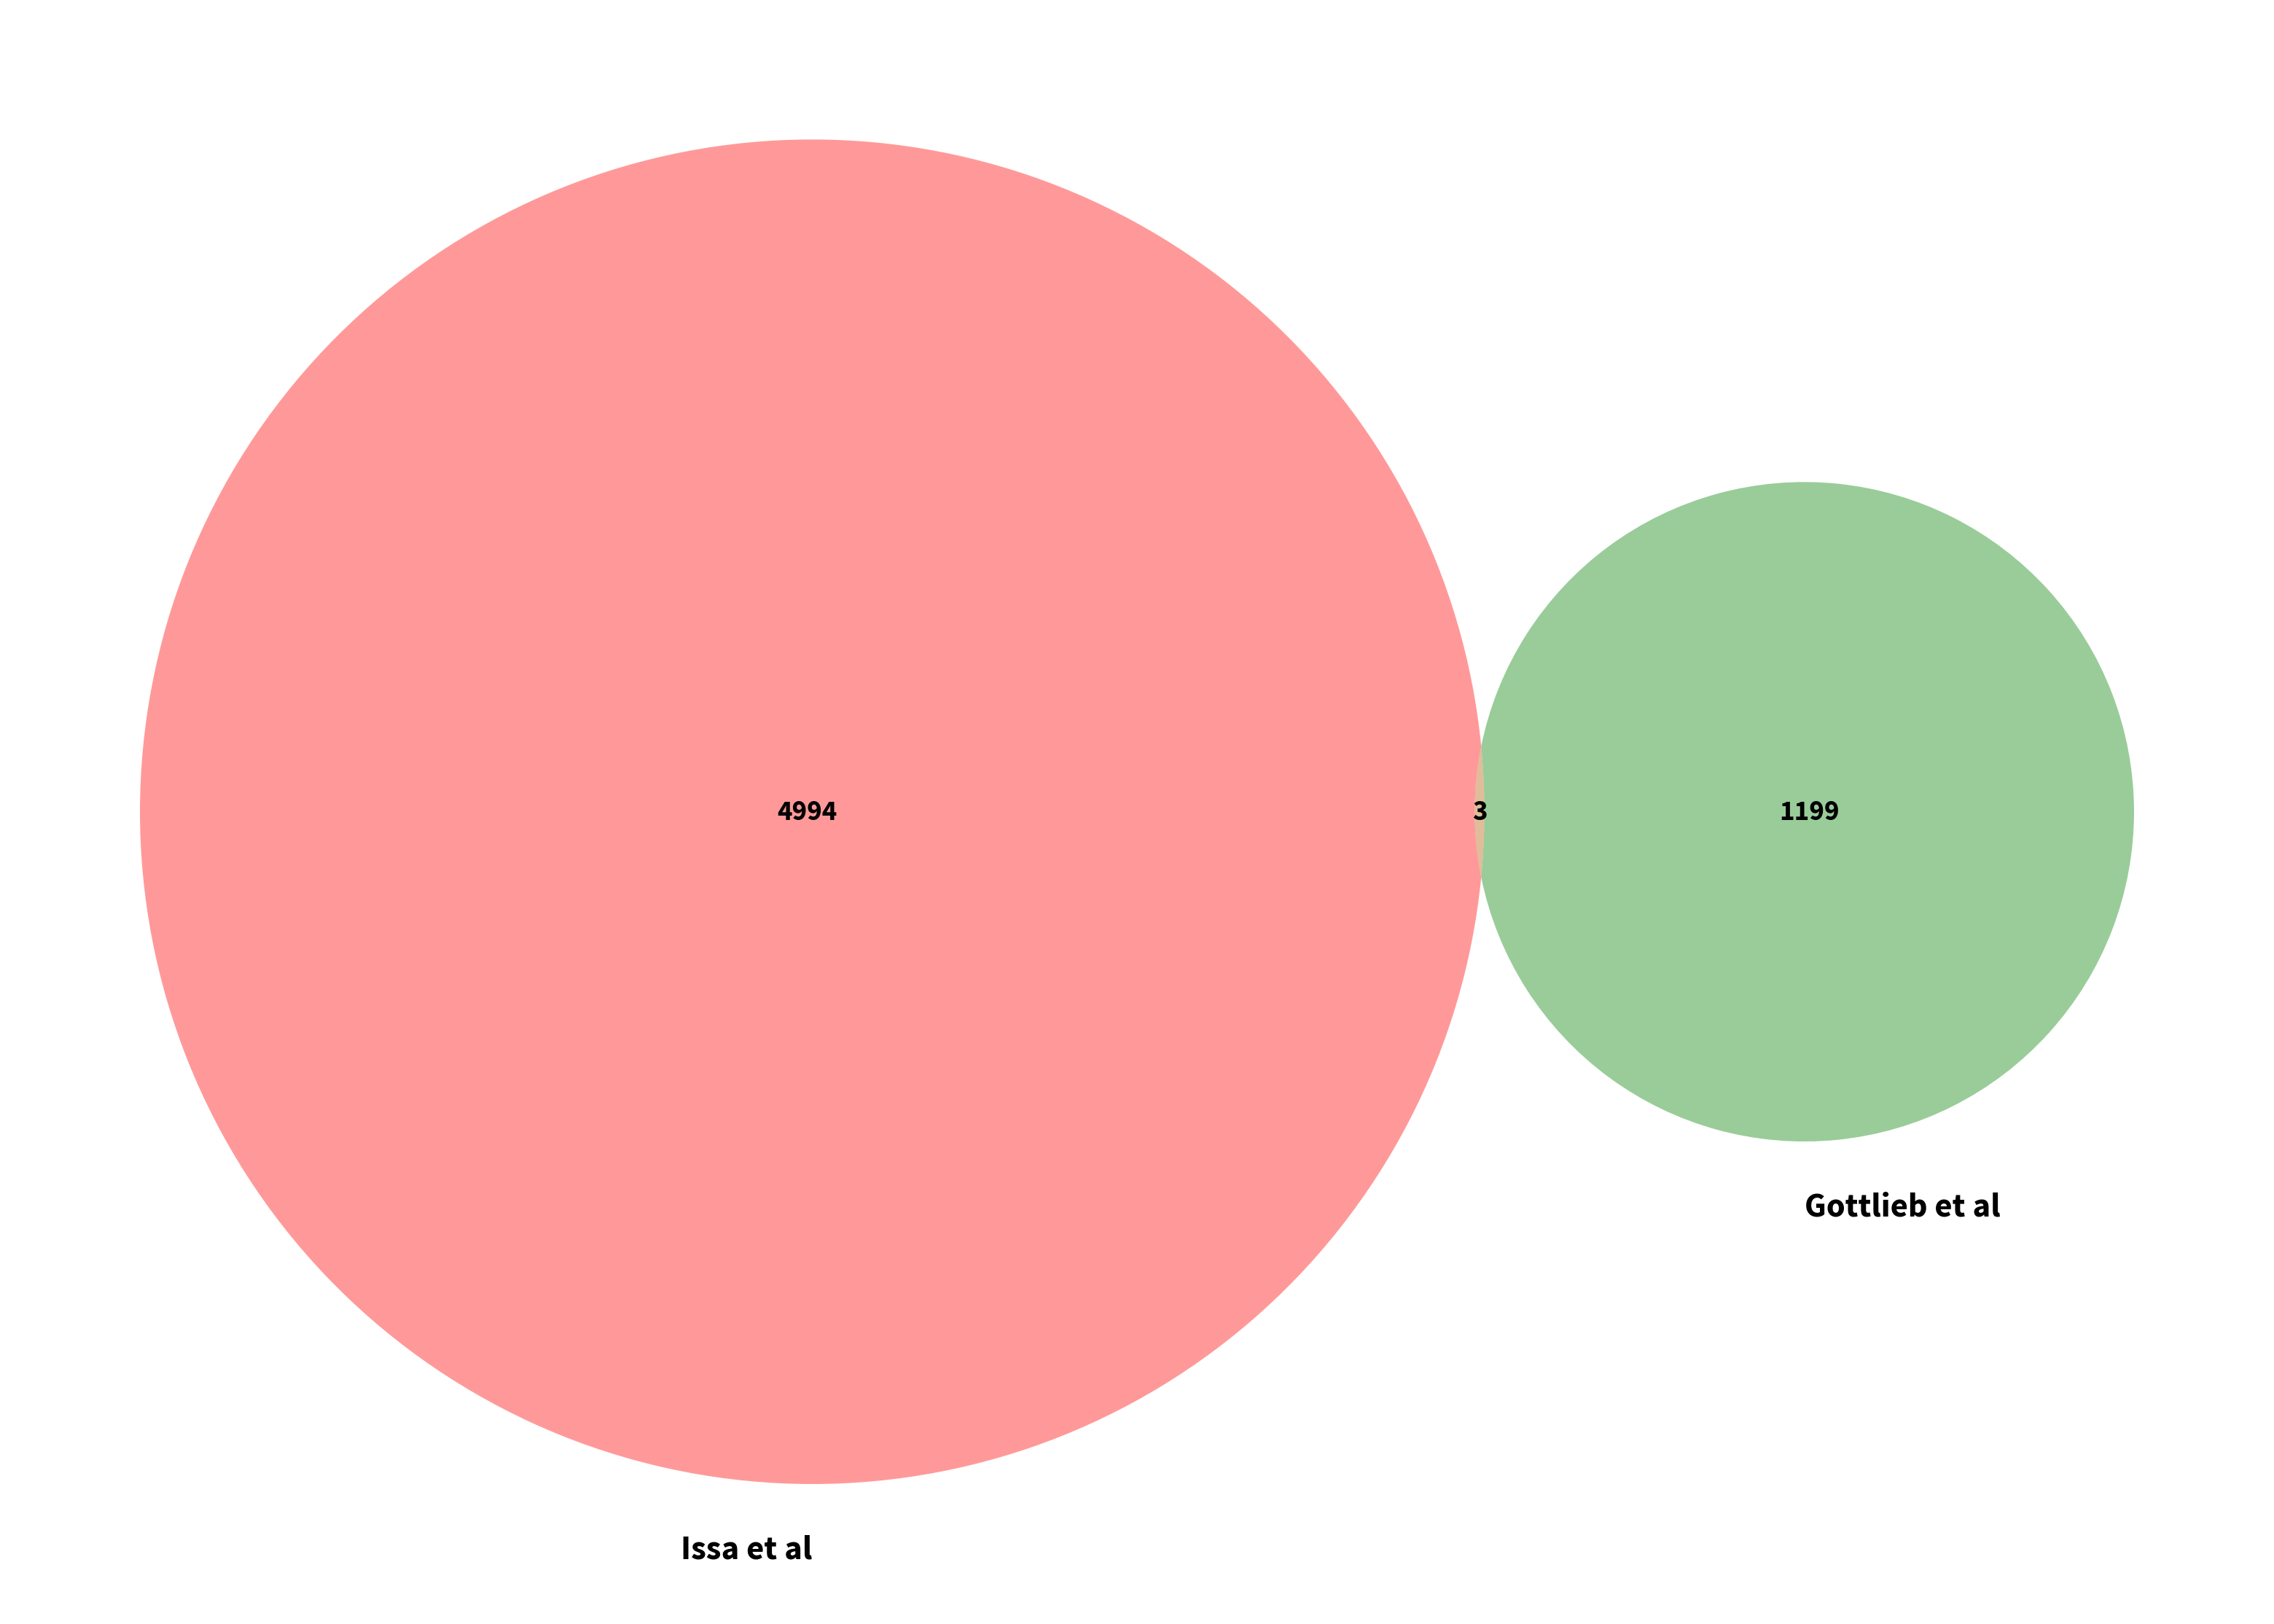

In [39]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib_venn import venn2, venn3

plt.figure(figsize=(40,40))

font = {'family' : 'Source Sans Pro',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)


venn2([issa_drug_disease_set, gottlieb_drug_disease_set], ('Issa et al', 'Gottlieb et al'))

plt.show()

In [40]:
pprint.pprint(issa_drug_disease_set.intersection(gottlieb_drug_disease_set))

{('http://www.wikidata.org/entity/Q4938950',
  'http://www.wikidata.org/entity/Q133823'),
 ('http://www.wikidata.org/entity/Q554881',
  'http://www.wikidata.org/entity/Q133823'),
 ('http://www.wikidata.org/entity/Q891284',
  'http://www.wikidata.org/entity/Q133823')}


All 3 are indications for migraine (Q133823), namely bolasterone (Q4938950), ethylmorphine (Q554881),  boldenone (Q891284) 

In [41]:
import json
with open('du_data.txt') as json_file:  
    du_data = json.load(json_file)
    
du_drug_disease_set = set()

for x in du_data:
    du_drug_disease_set.add((x['drug_qid'], x['disease_qid']))
    
print(len(du_drug_disease_set))

5972


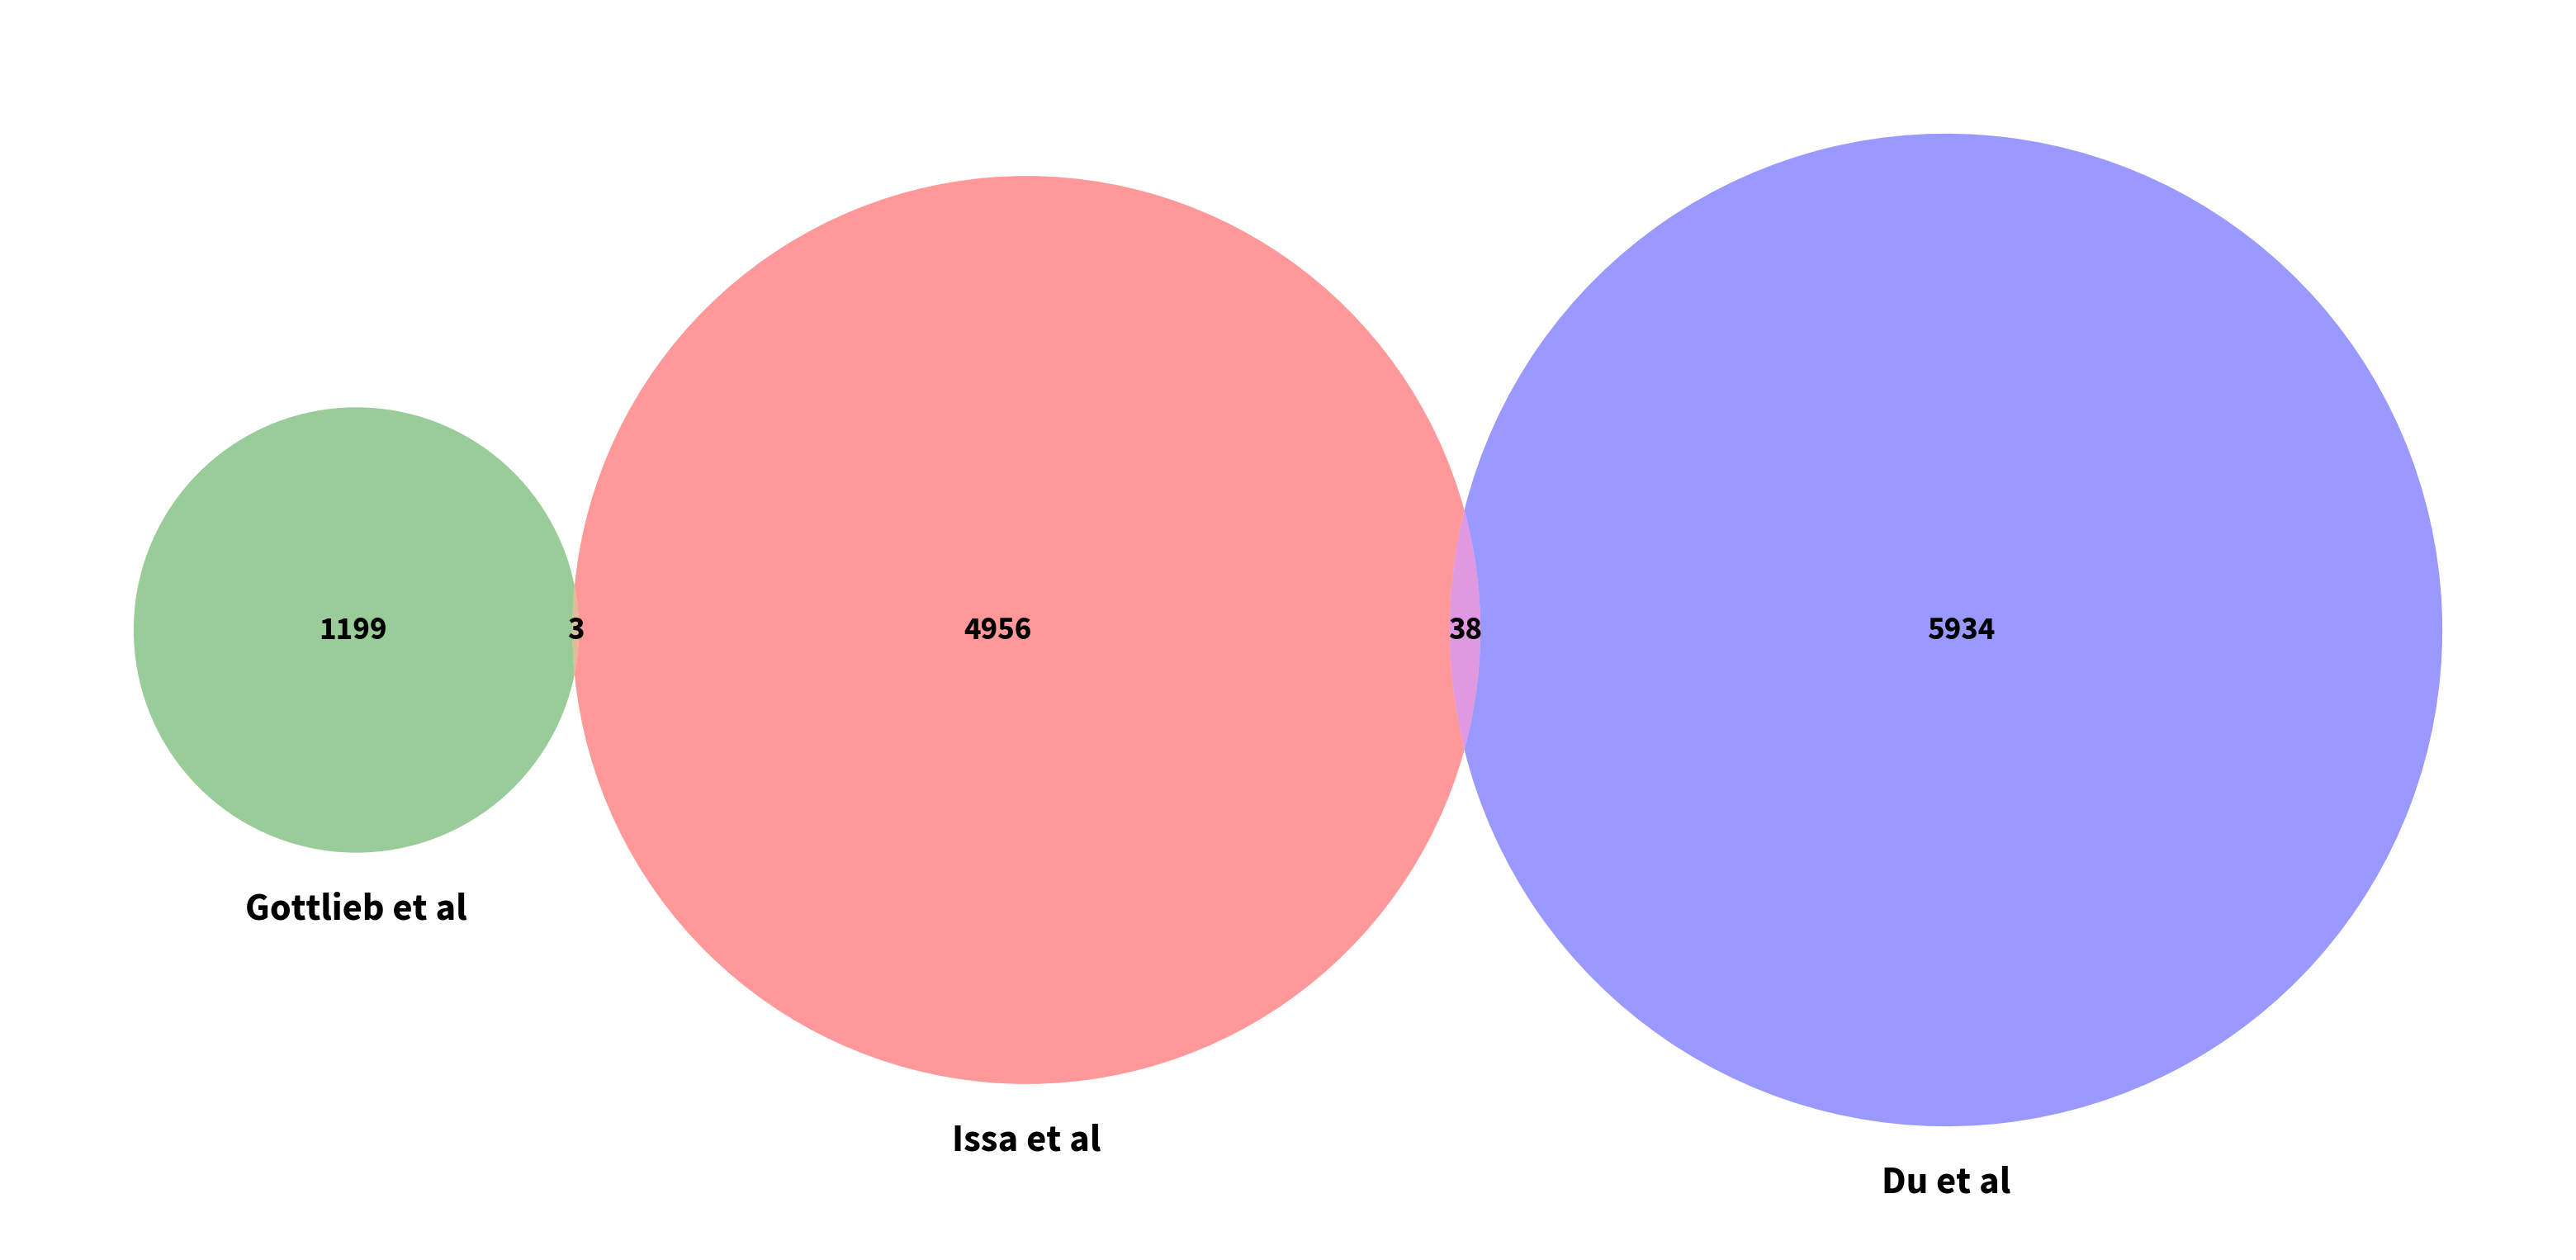

In [42]:
plt.figure(figsize=(40,40))

font = {'family' : 'Source Sans Pro',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)


venn3([issa_drug_disease_set, gottlieb_drug_disease_set, du_drug_disease_set], ('Issa et al', 'Gottlieb et al', 'Du et al'))

plt.show()

In [43]:
pprint.pprint(issa_drug_disease_set.intersection(du_drug_disease_set))

{('http://www.wikidata.org/entity/Q177094',
  'http://www.wikidata.org/entity/Q47912'),
 ('http://www.wikidata.org/entity/Q2072745',
  'http://www.wikidata.org/entity/Q1755568'),
 ('http://www.wikidata.org/entity/Q221174',
  'http://www.wikidata.org/entity/Q1755568'),
 ('http://www.wikidata.org/entity/Q265352',
  'http://www.wikidata.org/entity/Q1755568'),
 ('http://www.wikidata.org/entity/Q27077098',
  'http://www.wikidata.org/entity/Q47912'),
 ('http://www.wikidata.org/entity/Q27093070',
  'http://www.wikidata.org/entity/Q7269853'),
 ('http://www.wikidata.org/entity/Q27093313',
  'http://www.wikidata.org/entity/Q1755568'),
 ('http://www.wikidata.org/entity/Q27093399',
  'http://www.wikidata.org/entity/Q7269853'),
 ('http://www.wikidata.org/entity/Q27093453',
  'http://www.wikidata.org/entity/Q1755568'),
 ('http://www.wikidata.org/entity/Q27093556',
  'http://www.wikidata.org/entity/Q10832211'),
 ('http://www.wikidata.org/entity/Q27094098',
  'http://www.wikidata.org/entity/Q7269853')

In [44]:
du_drugs = set()
issa_drugs =set()

for x in du_data:
    du_drugs.add((x['drug_qid']))
    
for c, x in issa_data.iterrows():
    db = x['DrugBank WD']
    om = x['OMIM WD']
    
    if pd.notnull(db):
        issa_drugs.add(db)
        


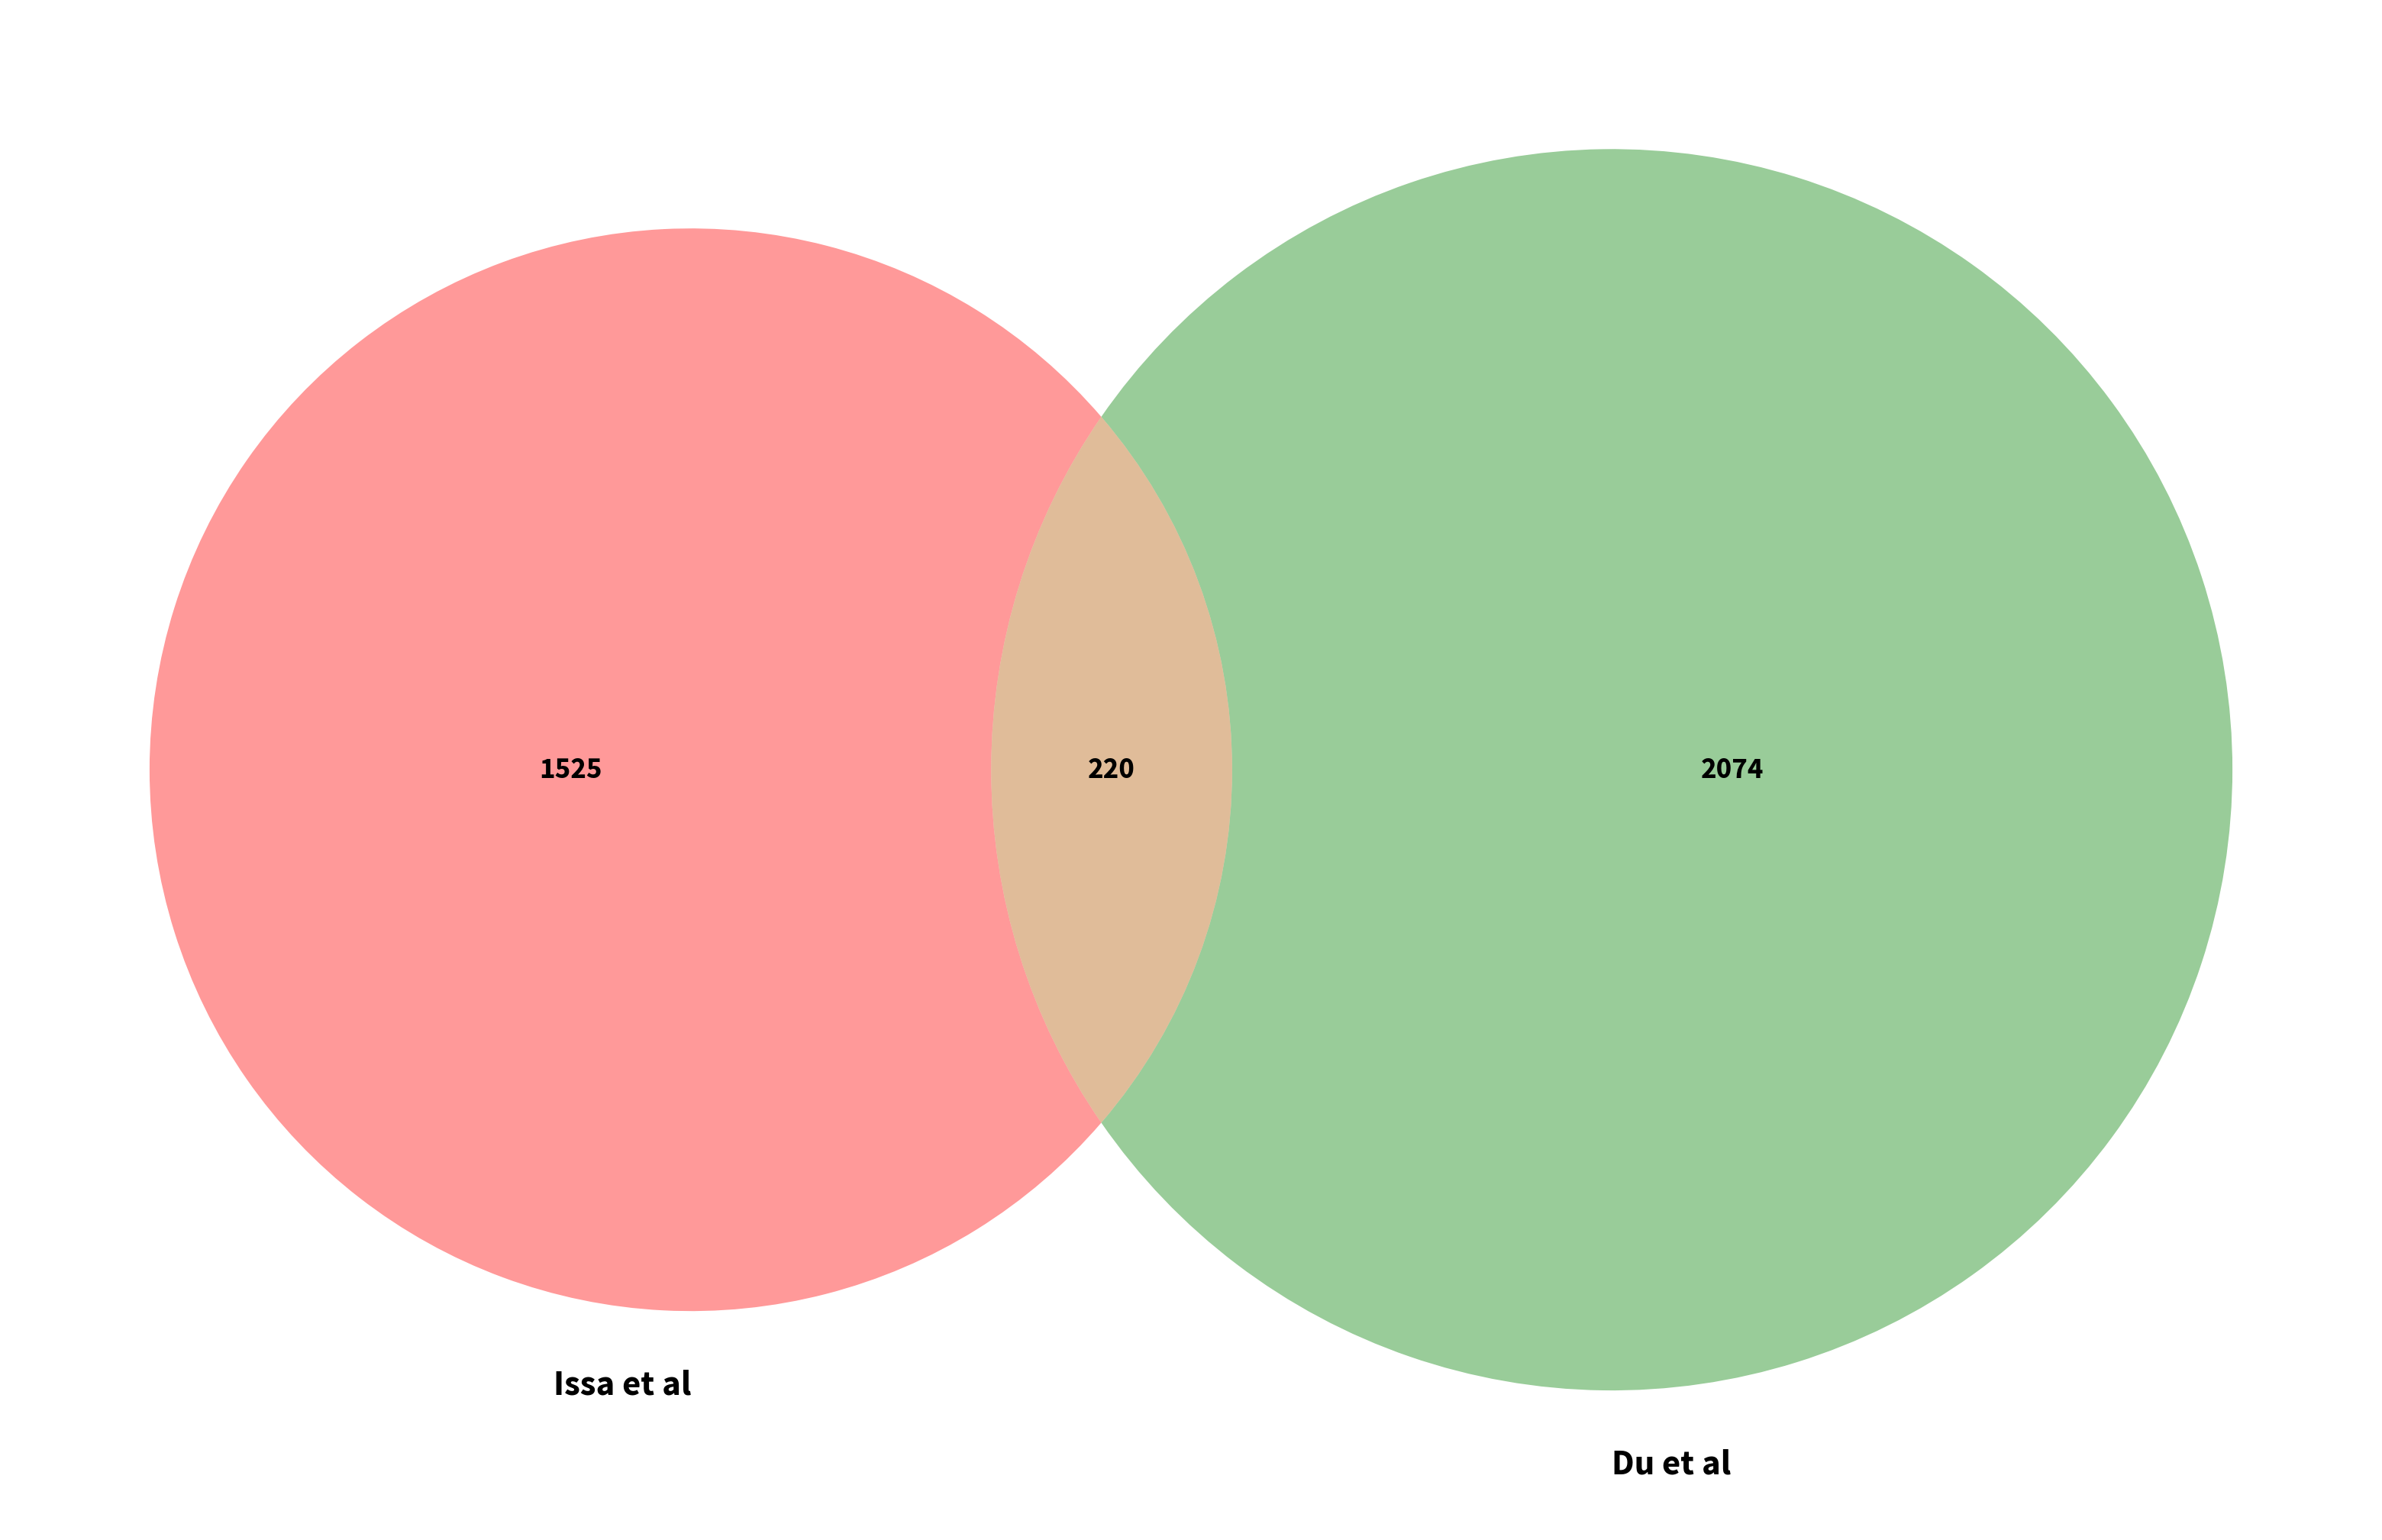

In [45]:
plt.figure(figsize=(40,40))

font = {'family' : 'Source Sans Pro',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)


venn2([issa_drugs, du_drugs], ('Issa et al', 'Du et al'))

plt.show()

In [46]:
gottlieb_drugs = {x[0] for x in gottlieb_drug_disease_set}
gottlieb_diseases = {x[1] for x in gottlieb_drug_disease_set}

issa_diseases = {x[1] for x in issa_drug_disease_set}
du_diseases = {x[1] for x in du_drug_disease_set}

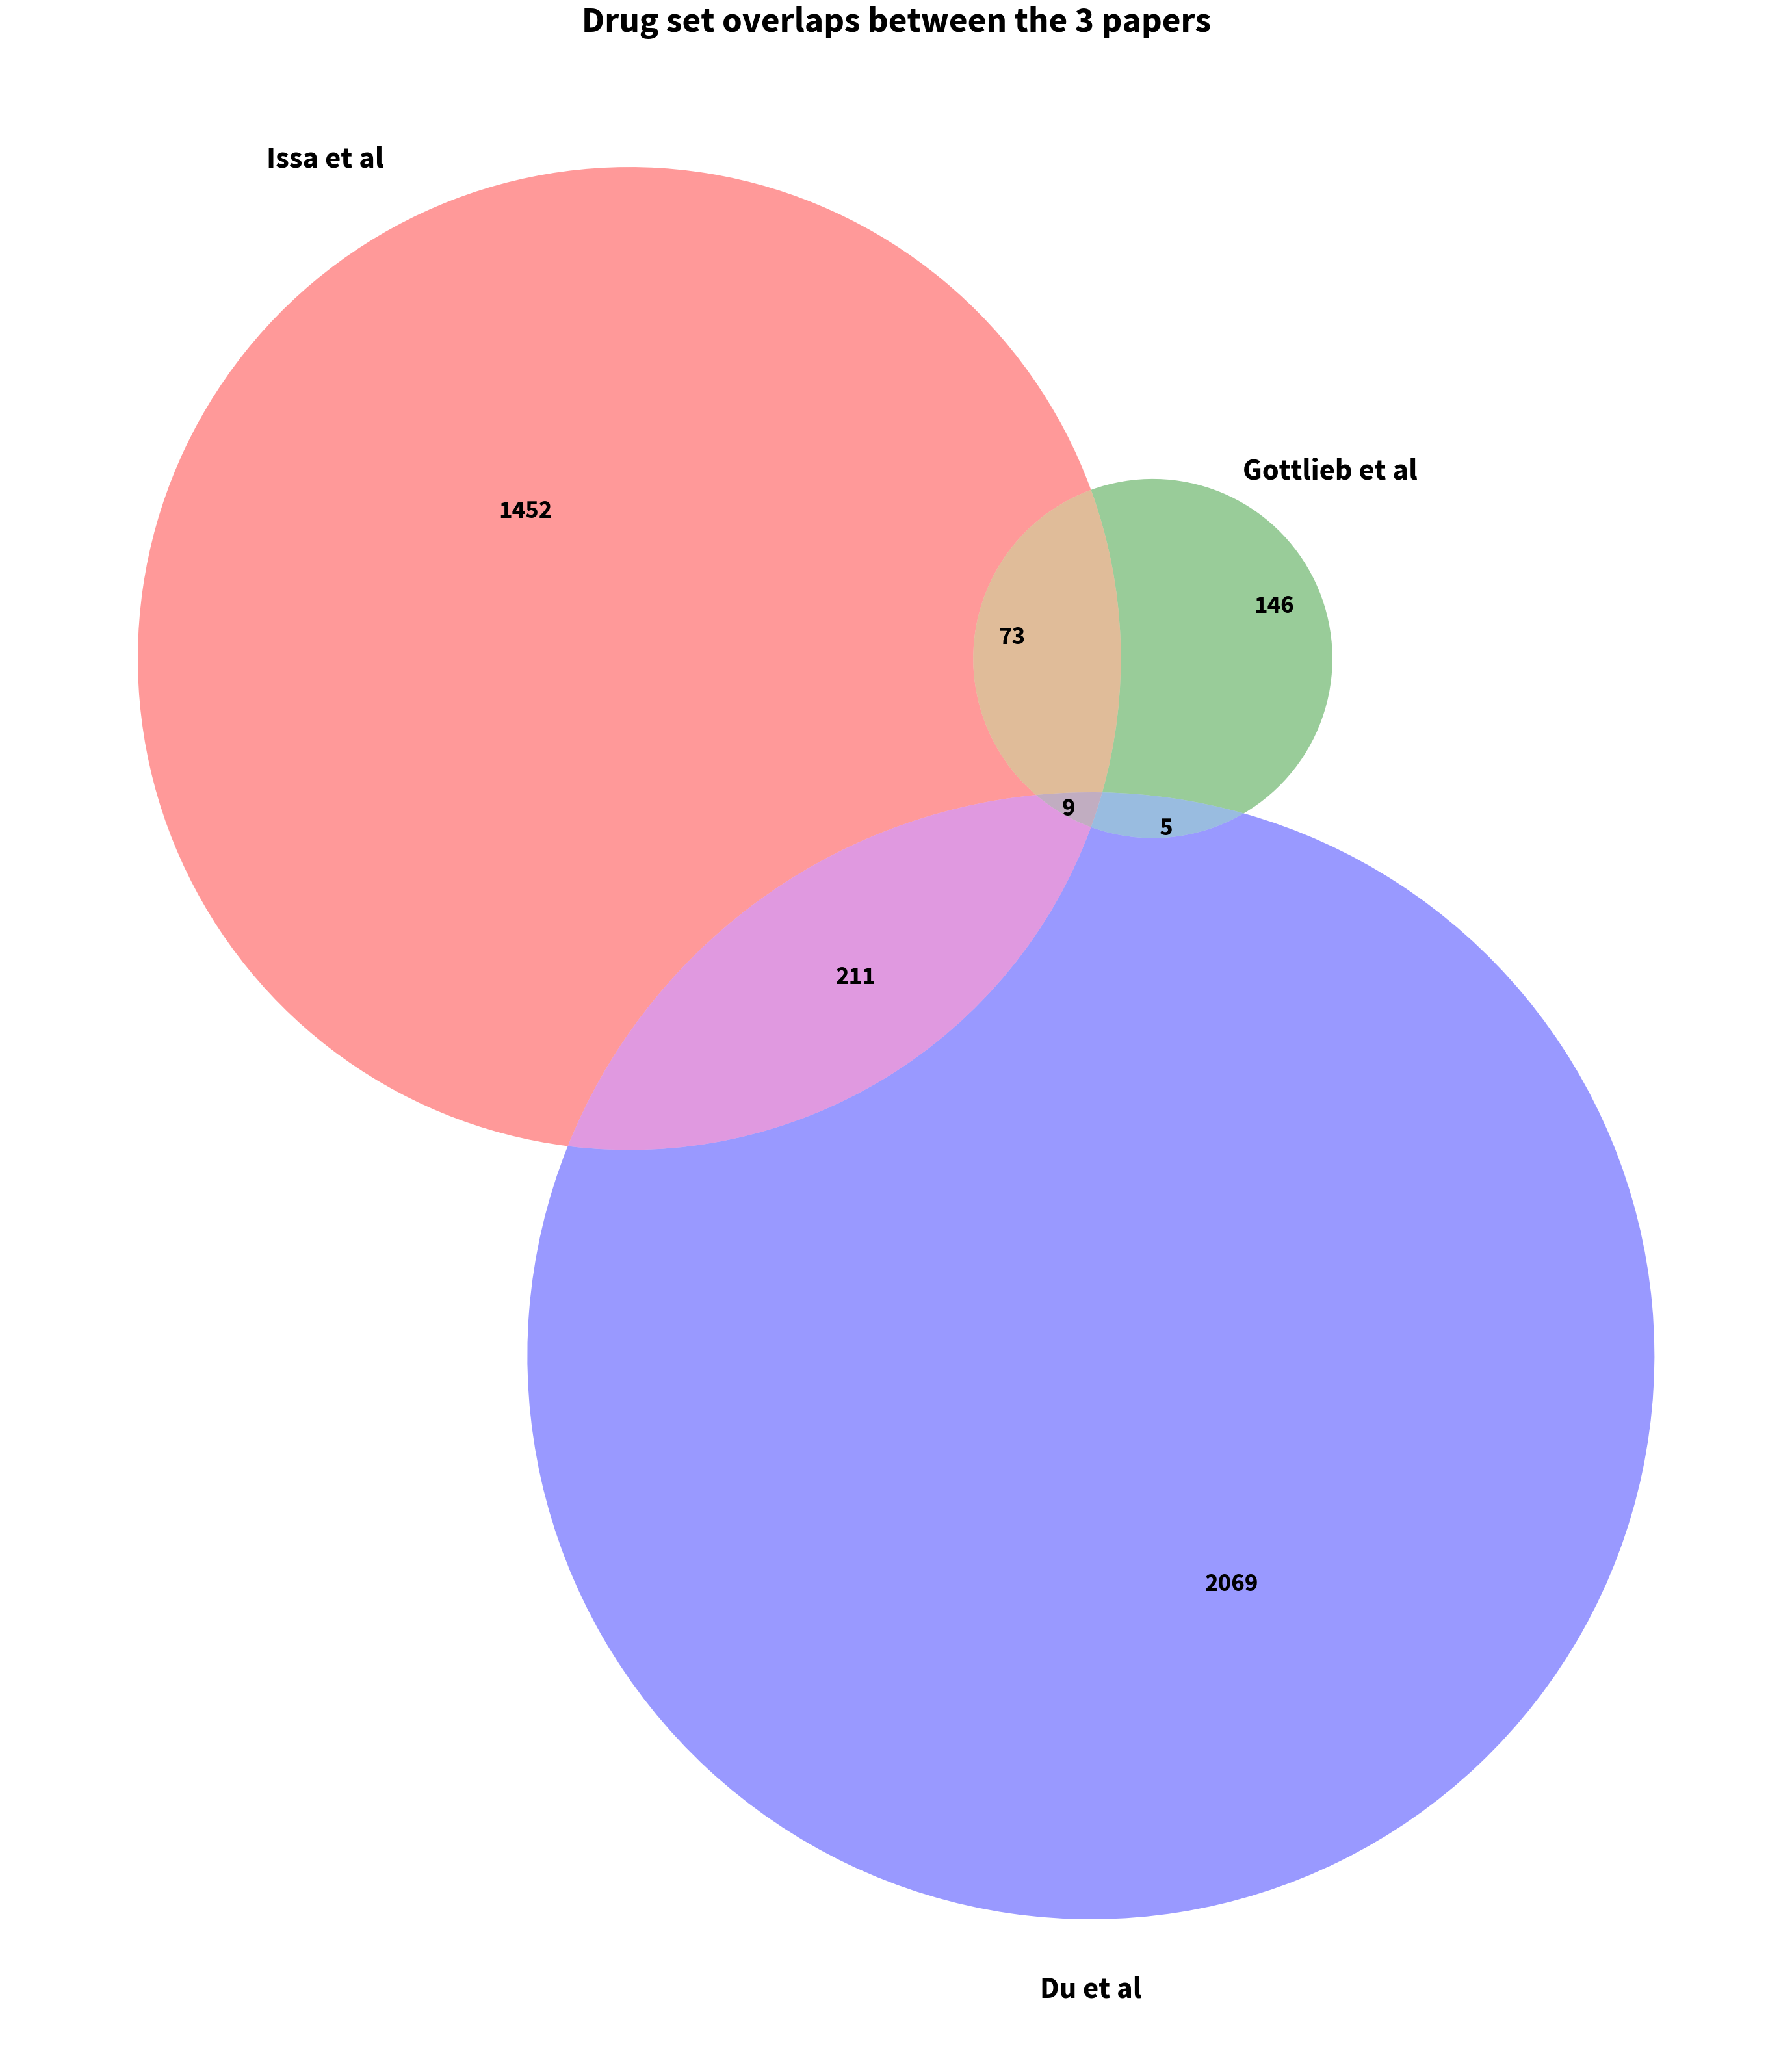

In [47]:
plt.figure(figsize=(40,40))

font = {'family' : 'Source Sans Pro',
        'weight' : 'bold',
        'size'   : 28}

title_font = {'family' : 'Source Sans Pro', 
              'weight' : 'bold',
              'size'   : 40}

matplotlib.rc('font', **font)


venn3([issa_drugs, gottlieb_drugs, du_drugs], ('Issa et al', 'Gottlieb et al', 'Du et al'))

plt.title("Drug set overlaps between the 3 papers", fontdict=title_font)


plt.show()

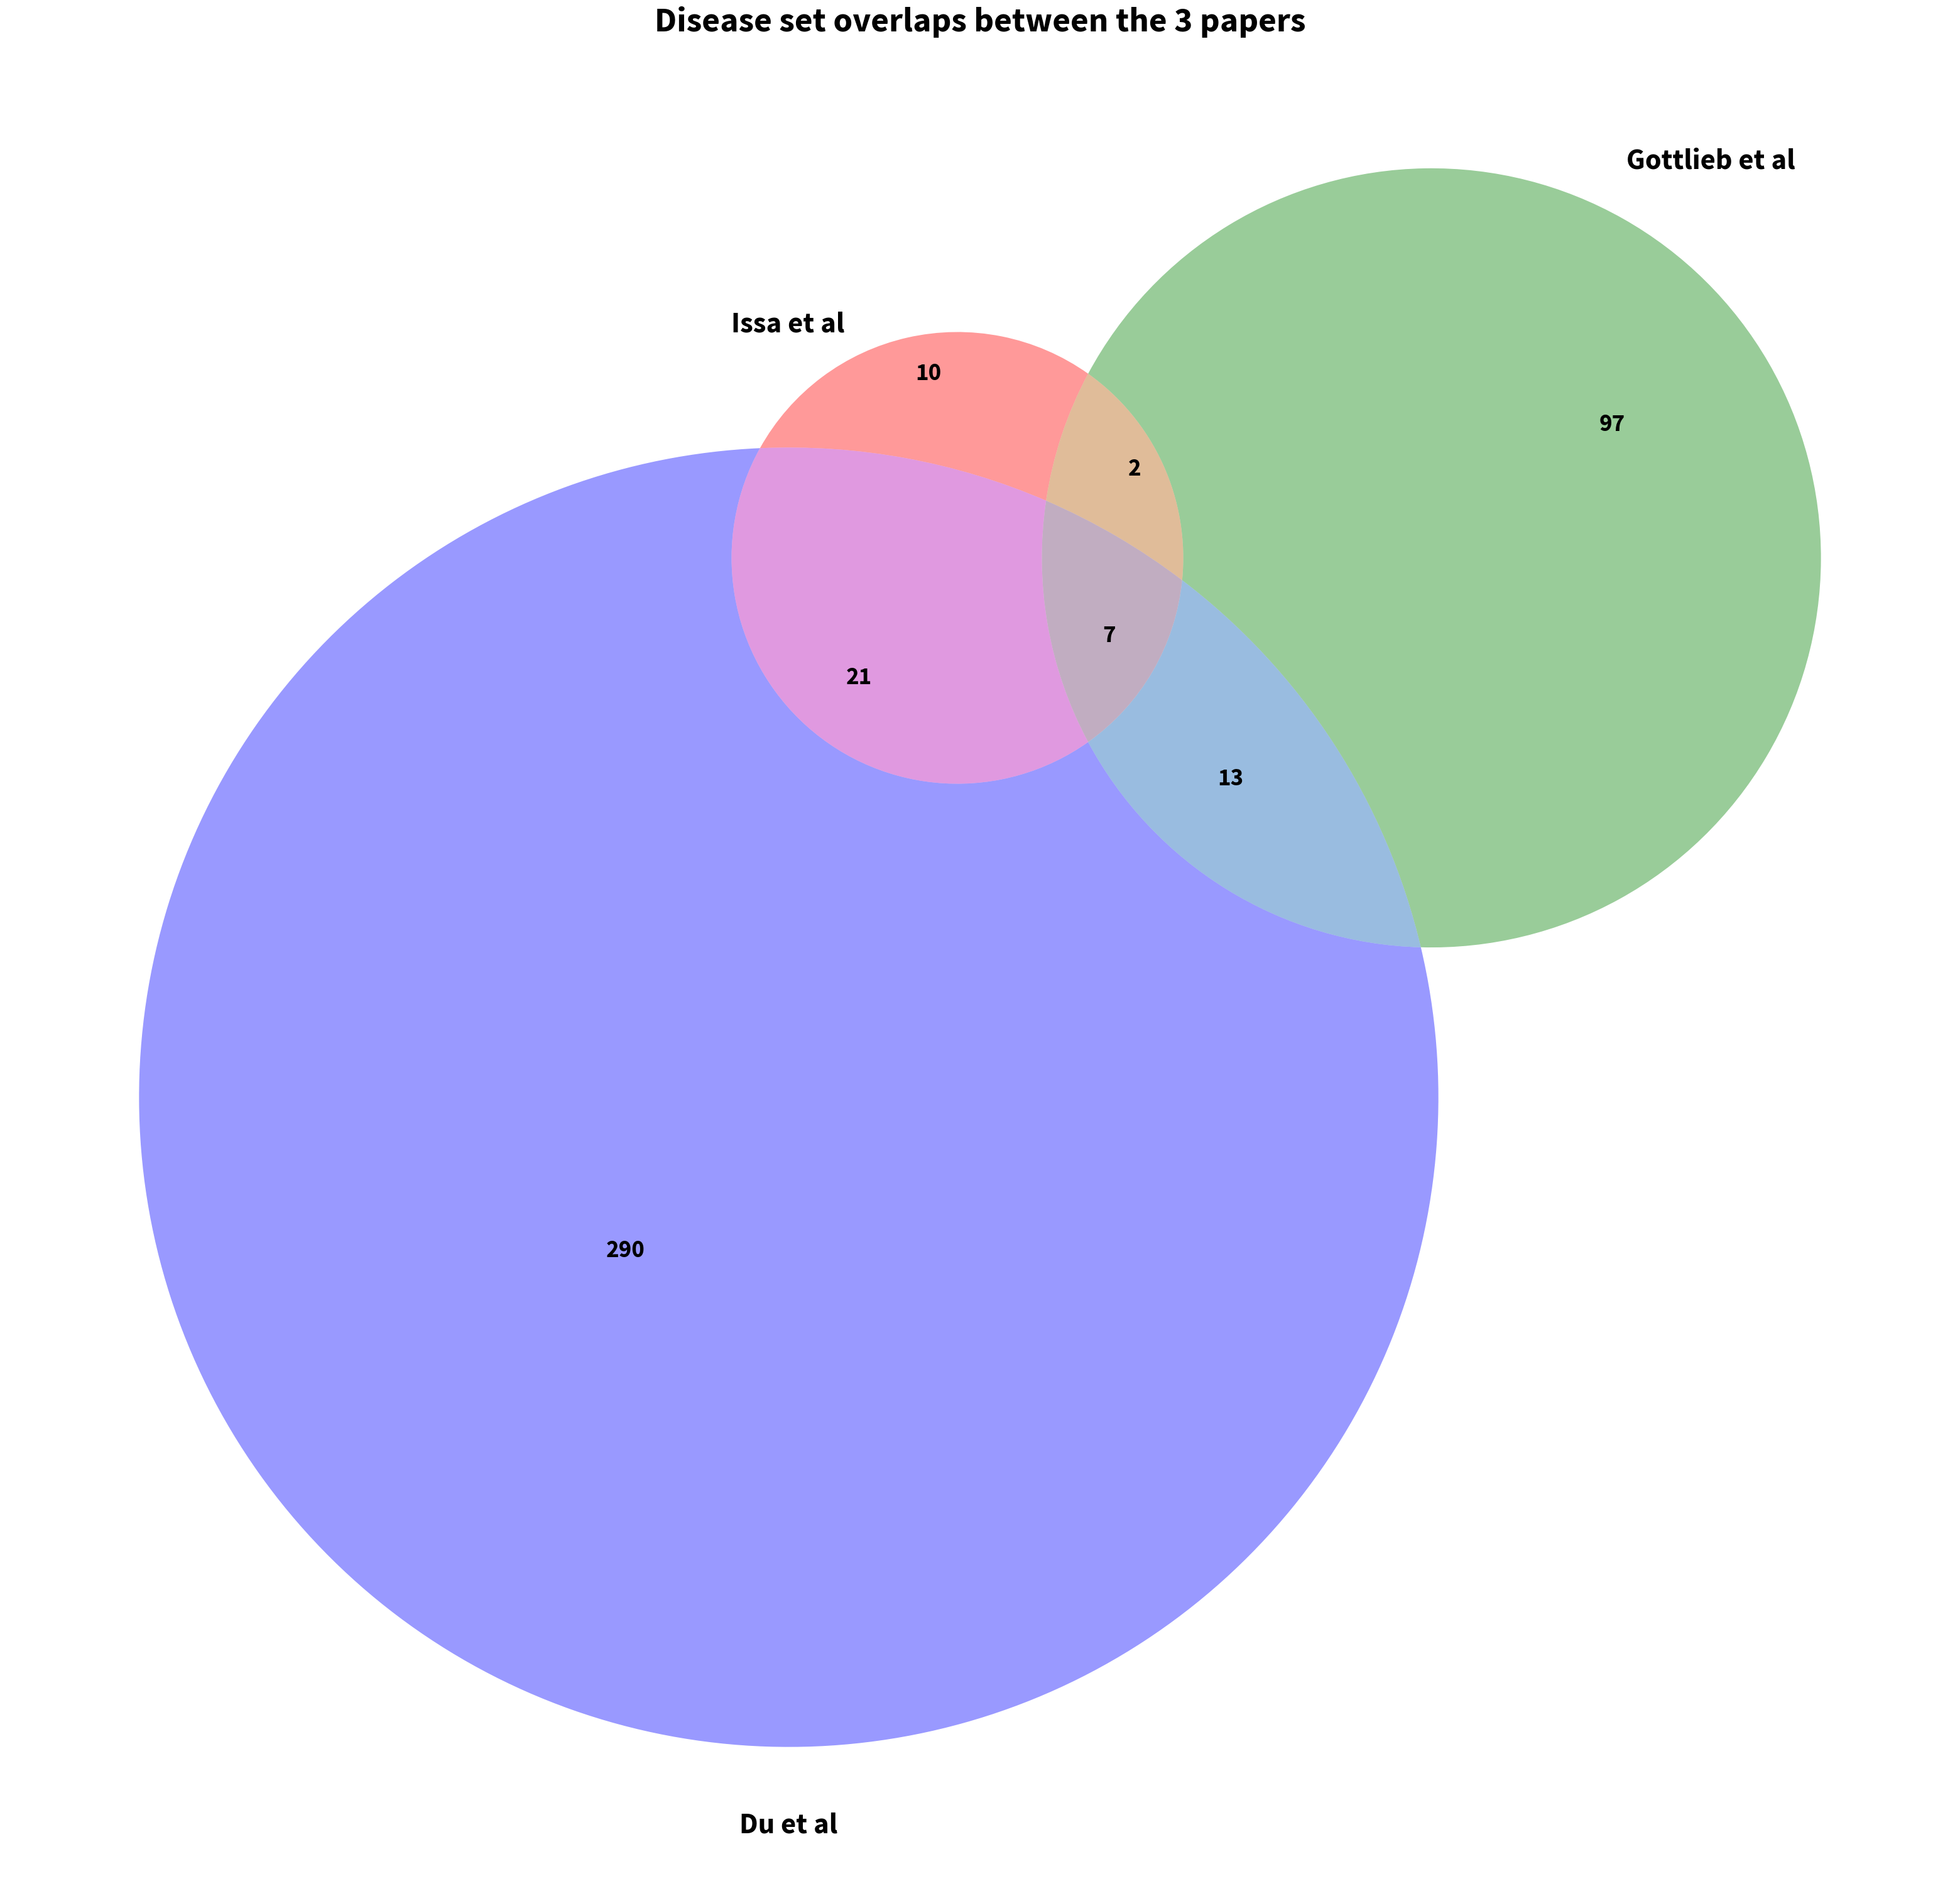

In [48]:
plt.figure(figsize=(40,40))

font = {'family' : 'Source Sans Pro',
        'weight' : 'bold',
        'size'   : 28}

title_font = {'family' : 'Source Sans Pro', 
              'weight' : 'bold',
              'size'   : 40}

matplotlib.rc('font', **font)


venn3([issa_diseases, gottlieb_diseases, du_diseases], ('Issa et al', 'Gottlieb et al', 'Du et al'))

plt.title("Disease set overlaps between the 3 papers", fontdict=title_font)


plt.show()